#### importing

In [12]:
import pandas as pd
import numpy as np

# For splitting data and building the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# for saving
from joblib import dump

#### Loading Dataset

In [13]:
# Load your integrated Sweets Makers data
df_sm = pd.read_csv("Integrated_SweetsMakers.csv")

# Quick sanity check
print(df_sm.head())
print(df_sm.info())


   Day Employee_ID    Name  Target_Laddoos  Target_Jalebis  Actual_Laddoos  \
0    1        SM01    Anil               5               5               5   
1    1        SM02  Bhavya               5               5               5   
2    1        SM03  Chitra               5               5               5   
3    1        SM04  Deepak               5               5               5   
4    1        SM05    Esha               5               5               5   

   Actual_Jalebis  Completion_Time (mins)  Feedback_Rating  Order_Volume  \
0               5                     502              4.5           112   
1               5                     463              4.7           112   
2               5                     483              3.9           112   
3               5                     487              5.0           112   
4               5                     452              5.0           112   

   Laddoos_Orders  Jalebis_Orders  Laddoos_Ratio  Jalebis_Ratio  \
0      

#### Selecting Features and Target

In [14]:
# Example feature set (customize as needed)
feature_cols = [
    "Completion_Time (mins)",
    "Feedback_Rating",
    "Order_Volume",
    "Laddoos_Orders",
    "Jalebis_Orders",
    "Laddoos_Ratio",
    "Jalebis_Ratio",
    "Demand_Laddoos_Ratio",
    "Demand_Jalebis_Ratio"
]

X = df_sm[feature_cols]            # Features
y = df_sm["Underperform"]          # Target


#### Splitting Train and Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Keeps the proportion of underperformers the same in train & test
)

print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (480, 9) (480,)
Test set size: (120, 9) (120,)


#### Picking Model

In [16]:
# Initialize the Random Forest
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_sm.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Make Predictions and Evaluate

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix:
[[95  0]
 [ 0 25]]


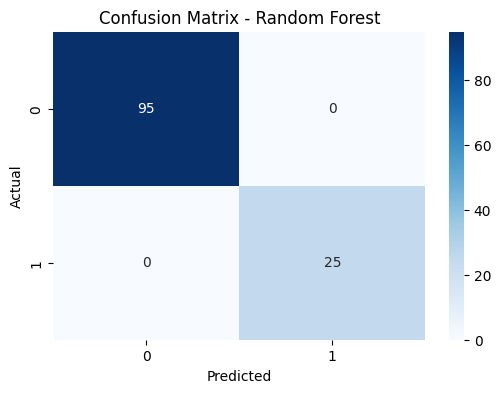

In [17]:
# Predictions on the test set
y_pred = rf_sm.predict(X_test)

# Evaluate with common metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optional: visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Check Feature Importance (Optional)

Completion_Time (mins): 0.010
Feedback_Rating: 0.003
Order_Volume: 0.002
Laddoos_Orders: 0.003
Jalebis_Orders: 0.002
Laddoos_Ratio: 0.459
Jalebis_Ratio: 0.513
Demand_Laddoos_Ratio: 0.002
Demand_Jalebis_Ratio: 0.004


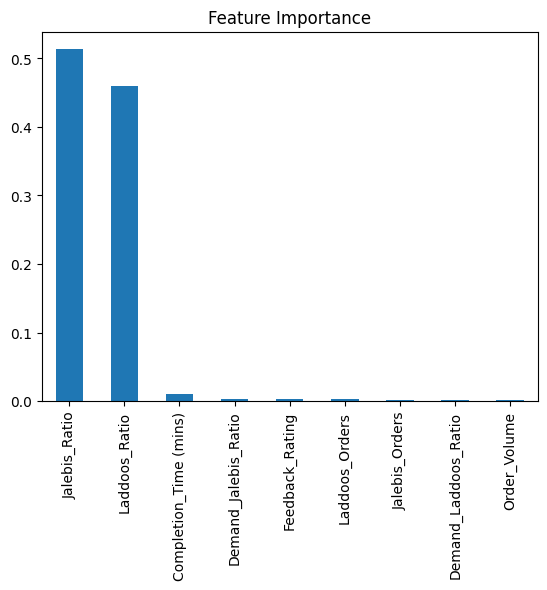

In [18]:
importances = rf.feature_importances_
for feat, imp in zip(feature_cols, importances):
    print(f"{feat}: {imp:.3f}")

# Optional bar plot
feat_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
feat_importances.plot(kind='bar', title='Feature Importance')
plt.show()


In [19]:
from joblib import dump

# Assuming rf_sm is your trained Sweets Makers model
dump(rf_sm, "rf_sm_model.joblib")
print("Sweets Makers model saved as rf_sm_model.joblib")


Sweets Makers model saved as rf_sm_model.joblib
